# Electric & Alternative Charging Stations in North America

### A Python project that uses Pandas and Matplotlib to analyze and visualize data on alternative fuel stations in North America. This project covers data manipulation with Pandas and visualization techniques with Matplotlib.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

 # Function 0: `load_data()`



 This function loads the data file stations.csv as a DataFrame using Pandas, performs some data cleansing and returns the DataFrame. Excluded rows with LNG and HY fuel types, missing (NAN) year, and year 2022.



In [97]:
# %%
# Define load_data() below:

def load_data():
    return pd.read_csv('stations.csv')


In [99]:
# %%
# The dataframe contains 60349 rows and 20 columns.

data = load_data()
data


,Fuel Type Code,Station Name,Street Address,Intersection Directions,City,State,ZIP,Status Code,Groups With Access Code,NG Fill Type Code,Geocode Status,Latitude,Longitude,ID,Owner Type Code,Open Date,Country,Access Code,Facility Type,Year
0,CNG,Spire - Montgomery Operations Center,2951 Chestnut St,NaN,Montgomery,AL,36107,E,Private,B,200-9,32.367916,-86.267021,17,T,2010-12-01,US,private,STANDALONE_STATION,2010.0
1,CNG,PS Energy - Atlanta,340 Whitehall St,"From I-7585 N, exit 91 to Central Ave, left on...",Atlanta,GA,30303,E,Public - Card key at all times,Q,200-8,33.745843,-84.398837,42,P,1994-07-15,US,public,STANDALONE_STATION,1994.0
2,CNG,Metropolitan Atlanta Rapid Transit Authority,2424 Piedmont Rd NE,NaN,Atlanta,GA,30324,E,Private - Government only,Q,200-8,33.821911,-84.367461,45,LG,1996-12-15,US,private,FLEET_GARAGE,1996.0
3,CNG,United Parcel Service,270 Marvin Miller Dr,NaN,Atlanta,GA,30336,E,Private,B,200-9,33.760256,-84.543822,64,P,1997-01-01,US,private,STANDALONE_STATION,1997.0
4,CNG,Arkansas Oklahoma Gas Corp,2100 S Waldron Rd,NaN,Fort Smith,AR,72903,E,Public - Credit card at all times,Q,200-9,35.362213,-94.375338,73,T,1997-01-01,US,public,UTILITY,1997.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70401,ELEC,SCHLITZ PARK SCHLITZ PARK,1555 N River Center Dr,NaN,Milwaukee,WI,53212,E,Public,NaN,GPS,43.050637,-87.910015,224376,NaN,2022-07-24,US,public,NaN,2022.0
70402,ELEC,NEXUS EAST STATION 2,720 Airport Blvd,NaN,Austin,TX,78702,E,Public,NaN,GPS,30.252438,-97.694427,224377,NaN,2022-07-24,US,public,NaN,2022.0
70403,ELEC,Raley's,6119 Horseshoe Bar Rd,NaN,Loomis,CA,95650,E,Public,NaN,GPS,38.817727,-121.188751,224380,NaN,2022-07-25,US,public,NaN,2022.0
70404,ELEC,13601 Glenoaks blvd,13601 Glenoaks blvd,NaN,Los Angeles,CA,91342,E,Public,NaN,GPS,34.318879,-118.464478,224381,NaN,2022-07-25,US,public,NaN,2022.0


 # Function 1: `plot_pie_by_column(df, column, title)`



 This function receives a dataframe df (similar to the full dataframe but not necessarily the same), a column name and a title for the plot. It then counts the number of stations for each category in `df[column]` and produces a pie chart illustrating the distribution of these numbers.



 ## Function definition

In [102]:
# %%
# Define Function 1 below:
def plot_pie_by_column(df, column, title):
    counts = df.groupby(column)[column].count().sort_values(ascending=False)
    plt.pie(x=counts, startangle=0, labels=counts.index, autopct='%1.2f%%')
    plt.title(title)
    plt.show()

 ## Plots based on Function 1





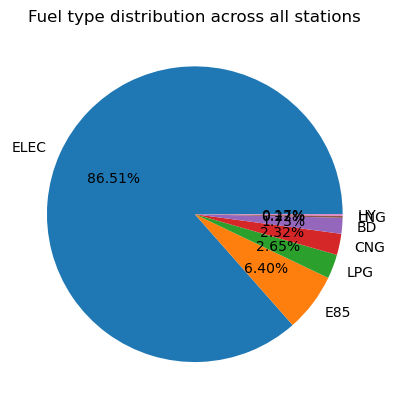

In [105]:
# %%
# Fuel type distribution across all stations:
plot_pie_by_column(data, 'Fuel Type Code', 'Fuel type distribution across all stations')



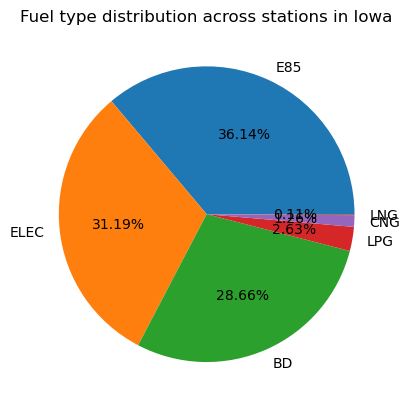

In [107]:
# %%
# Fuel type distribution across stations in Iowa:
plot_pie_by_column(data[ data['State']=='IA' ], 'Fuel Type Code', 'Fuel type distribution across stations in Iowa')


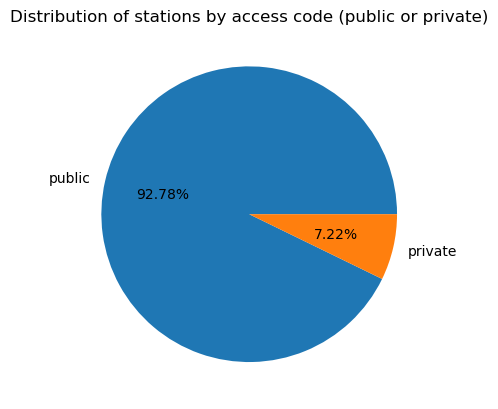

In [109]:
# %%
# Distribution of stations by access code (public or private):
plot_pie_by_column(data, 'Access Code', 'Distribution of stations by access code (public or private)')



 # Function 2: `plot_station_counts(df, column, title, top_n = 10)`



 This function receives a dataframe df (similar to the full dataframe but not necessarily the same), a column name and a title for the plot. It processes the data as in `plot_pie_by_column`, but instead of producing a pie chart, produces a bar plot illustrating the actual counts. The optional parameter `top_n` determines the maximum number of categories to display.



 ## Function definition

In [112]:
# %%
# Define Function 2 below:
def plot_station_counts(df, column, title, top_n = 10):
    counts = df.groupby(column)[column].count().sort_values(ascending=False).iloc[0:top_n]
    plt.figure(figsize=(4,3))
    plt.bar(x=counts.index, height=counts, width=0.75)
    plt.xticks(rotation=90)
    plt.ylabel('Stations')
    plt.xlabel(column)
    plt.title(title)
    plt.show()



 ## Plots based on Function 2


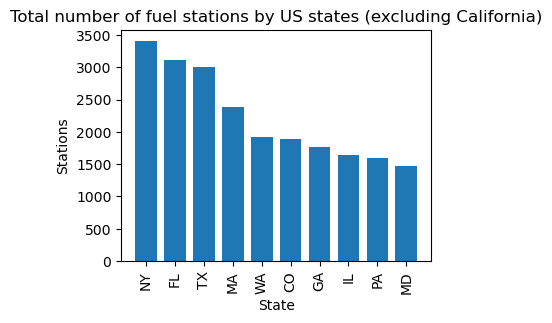

In [115]:
# %%
# Total number of fuel stations by US states (excluding California):
plot_station_counts(data[ (data['State'] != 'CA') & (data['Country'] == 'US') ], 'State', 'Total number of fuel stations by US states (excluding California)')


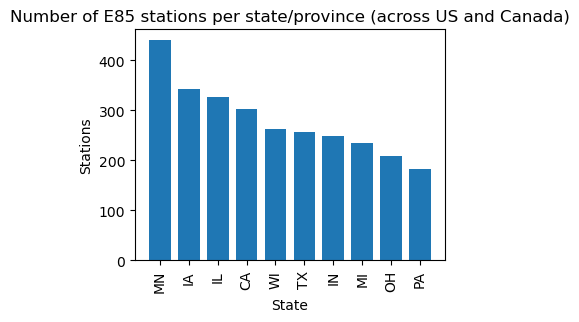

In [117]:
# %%
# Number of E85 stations per state/province (across US and Canada):
plot_station_counts(data[ data['Fuel Type Code'] == 'E85'  ], 'State','Number of E85 stations per state/province (across US and Canada)')



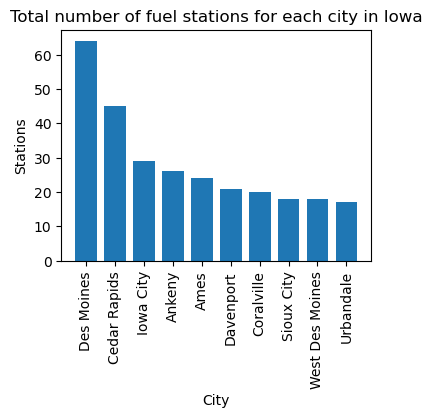

In [119]:
# %%
# Total number of fuel stations for each city in Iowa:
plot_station_counts(data[ data['State'] == 'IA' ], 'City', 'Total number of fuel stations for each city in Iowa')


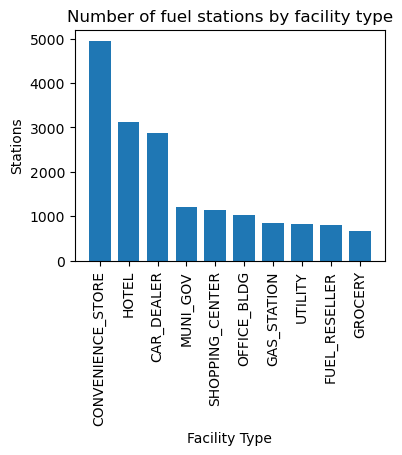

In [121]:
# %%
# Number of fuel stations by facility type:
plot_station_counts(data, 'Facility Type', 'Number of fuel stations by facility type')



 # Function 3: `plot_station_counts_per_year(df, title)`



 This function receives a dataframe `df` (similar to the full dataframe but not necessarily the same) and a title for the plot. It then counts the total number of stations opened in each year in the provided `df` and produces a line plot.


In [124]:
# %%
# Define Function 3 below:
def plot_station_counts_per_year(df, title):
    counts = df.groupby('Year')['Year'].count()
    plt.figure(figsize=(7,3))
    plt.plot(counts.index, counts.values, color='red')
    plt.xlabel('Date')
    plt.ylabel('Stations Opened')
    plt.title(title)
    plt.show()


 ## Plots based on Function 3


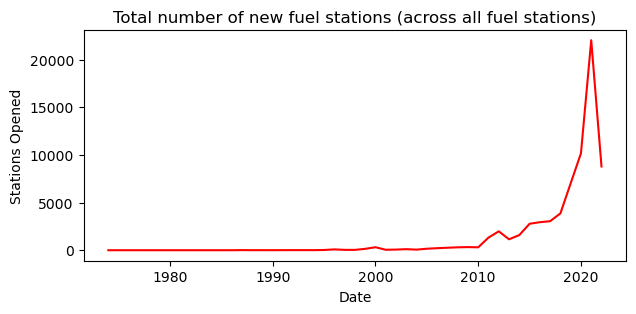

In [127]:
# %%
# Total number of new fuel stations (across all fuel stations):
plot_station_counts_per_year(data, 'Total number of new fuel stations (across all fuel stations)')




 # Function 4: `plot_station_counts_per_year_fuel_type(df, title, fuel_types)`



 This function is similar to `plot_station_counts_per_year` but instead of counting the total number of new stations per year, it counts the number of new stations per year for each fuel type given in the list `fuel_types`. It then produces a plot with a __separate line and legend__ for each fuel type.


In [130]:
# %%
# Define Function 4 below:
def plot_station_counts_per_year_fuel_type(df, title, fuel_types):
    for fuel in fuel_types:
        counts = df[ df['Fuel Type Code'] == fuel ].groupby('Year')['Year'].count()
        plt.plot(counts.index, counts.values)
    plt.xlabel('Date')
    plt.ylabel('Stations Opened')
    plt.legend(fuel_types)
    plt.title(title)


 ## Plots based on Function 4



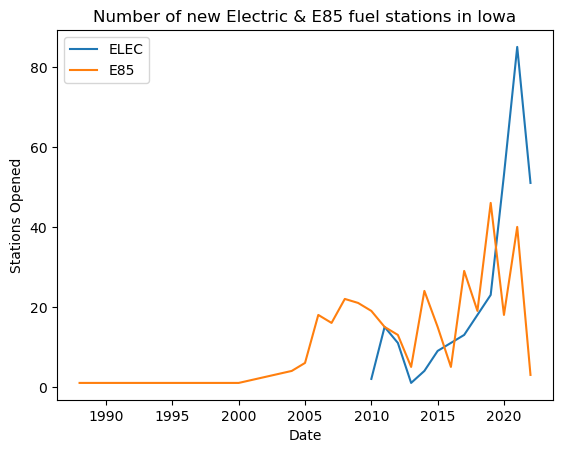

In [133]:
# %%
# Number of new Electric & E85 fuel stations in Iowa:

plot_station_counts_per_year_fuel_type(data[ data['State'] == 'IA' ], 'Number of new Electric & E85 fuel stations in Iowa', ('ELEC', 'E85'))
    


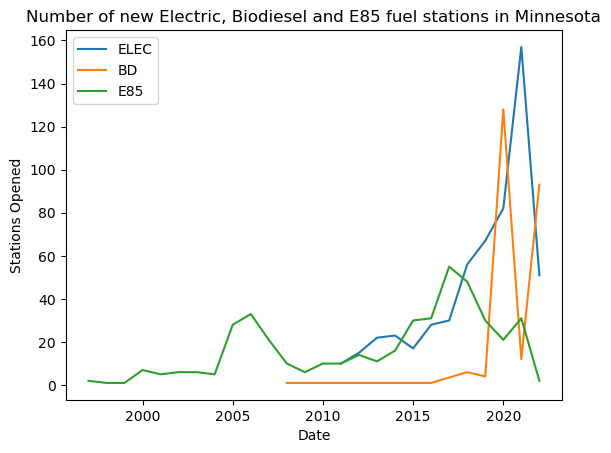

In [135]:
# %%
# Number of new Electric, Biodiesel and E85 fuel stations in Minnesota:
plot_station_counts_per_year_fuel_type(data[ data['State'] == 'MN' ], 'Number of new Electric, Biodiesel and E85 fuel stations in Minnesota', ('ELEC', 'BD', 'E85'))



 # Function 5: `plot_map_state(df, state_to_highlight)`



 This function receives a dataframe `df` and a state/province code. It then produces a scatter plot of longitude and latitude illustrating the location of fuel stations on the map. Fuel stations are color coded by country (blue for the US and red for Canada).


In [138]:
# %%
# Define Function 5 below:
def plot_map_state(df, state_to_highlight):
    highlight = ['blue'] * df.shape[0]
    for i in range(df.shape[0]):
        if df['Country'][i] == 'CA':
            highlight[i] = 'red'
        elif df['State'][i] == state_to_highlight:
            highlight[i] = 'cyan'
    
    plt.figure(figsize=(12,7.5), facecolor='black')
    plt.scatter(x=df['Longitude'],y=df['Latitude'], s=1, c=highlight)
    plt.xlim(-165,-50)
    plt.ylim(15,70)
    plt.axis('off')
    plt.show()


 ## Plots based on Function 5


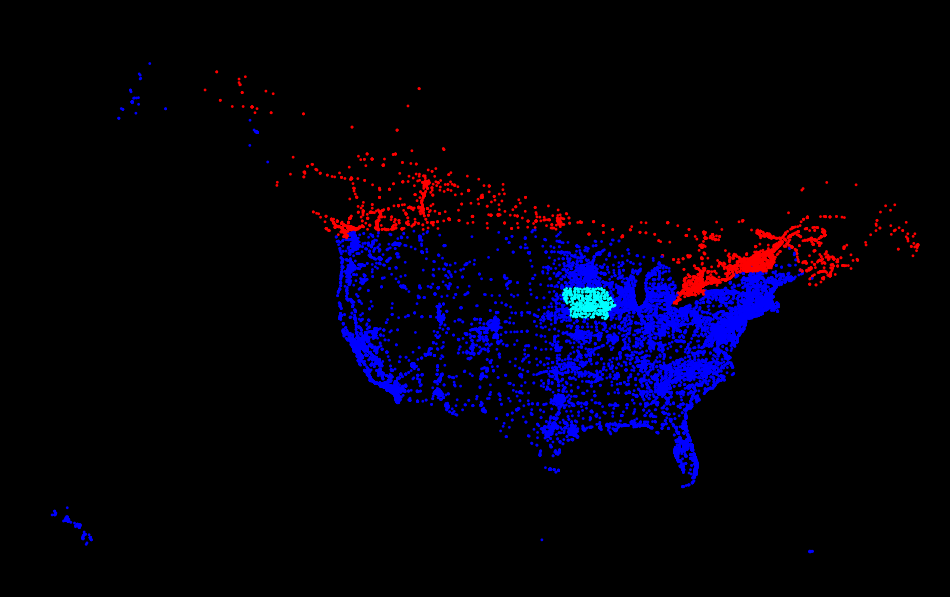

In [141]:
# %%
# Location of fuel stations on the map (highlighting Iowa):
plot_map_state(data, 'IA')



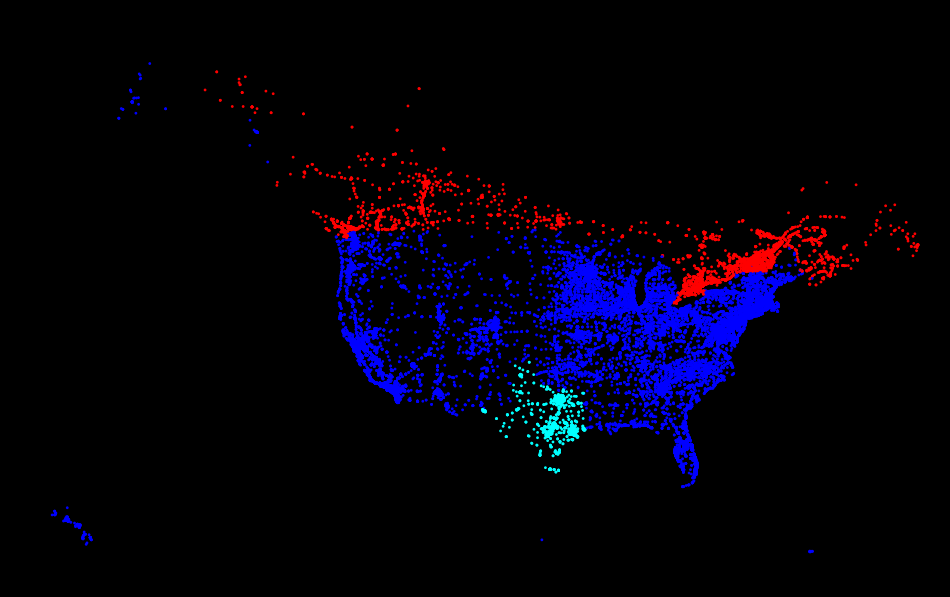

In [143]:
# %%
# Location of fuel stations on the map (highlighting Texas):
plot_map_state(data, 'TX')



 # Function 6: `plot_map_fueltypes(df, fueltype_colors)`



 This function is similar to `plot_map_state` but instead of coloring the stations by country/state, it receives a dictionary with some fuel types as keys and their colors as values, and colors the stations accordingly. The stations whose fuel type is not in the keys of `fueltype_colors` are colored by gray.


In [146]:
# %%
# Define Function 6 below:
def plot_map_fueltypes(df, fueltype_colors):
    highlight = ['gray'] * df.shape[0]
    colors = ['cyan', 'red', 'yellow', 'blue', 'green', 'orange', 'purple', 'magenta']
    colorCode = {}
    for i, fuel in enumerate(fueltype_colors):
        colorCode[fuel] = colors[i]
    for i in range(df.shape[0]):
        highlight[i] = colorCode.get(df['Fuel Type Code'][i], 'gray') 
    
    plt.figure(figsize=(12,7.5), facecolor='black')
    plt.scatter(x=df['Longitude'],y=df['Latitude'], s=1, c=highlight)
    plt.xlim(-165,-50)
    plt.ylim(15,70)
    plt.axis('off')
    plt.show()


 ## Plots based on Function 6



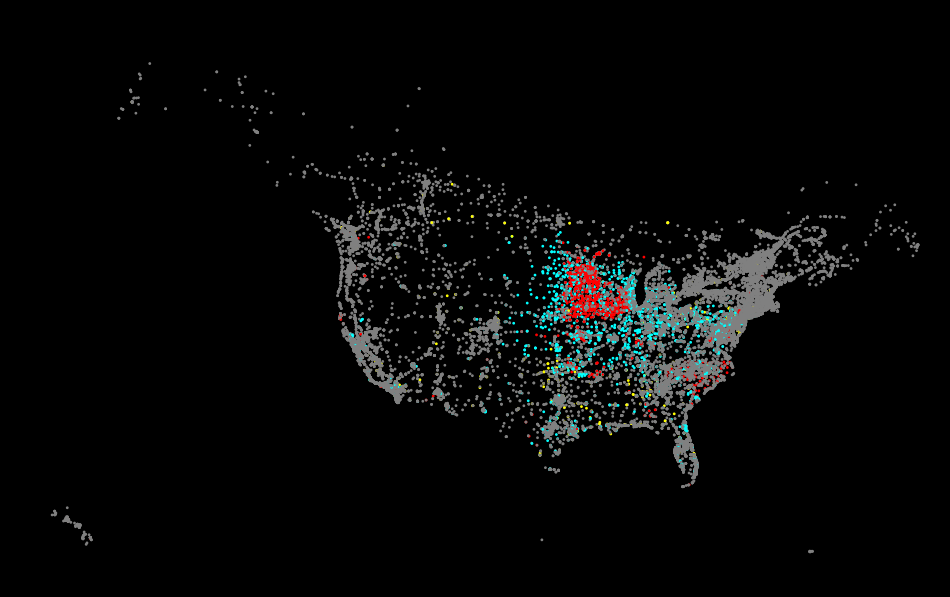

In [149]:
# %%
# Location of fuel stations on the map (highlighting E85 (cyan), BD (red) and CNG (yellow)):
plot_map_fueltypes(data, ('E85', 'BD', 'CNG'))



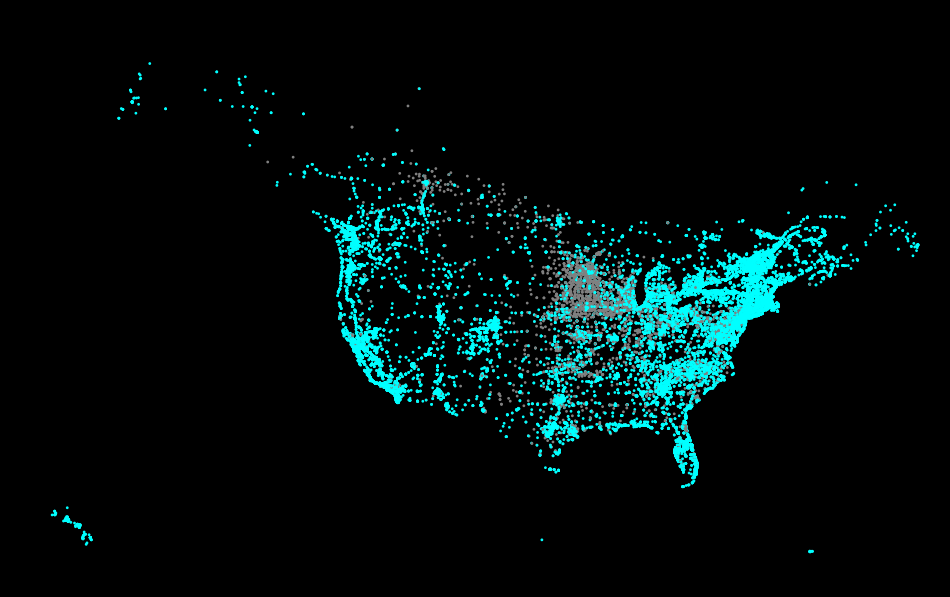

In [151]:
# %%
# Location of fuel stations on the map (highlighting Electric stations (cyan)):
plot_map_fueltypes(data, ('ELEC',))

